In [92]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

['ActiveNBAStats.csv']


In [93]:
nba = pd.read_csv('../input/ActiveNBAStats.csv')

In [94]:
nba.head()

,Unnamed: 0,player,season,GP,MIN,PTS,FGM,FGA,TPM,TPA,FTM,FTA,REB,AST,STL,BLK,TOV
0,0,James Harden,2019.0,78.0,36.8,36.1,10.8,24.5,4.8,13.2,9.7,11.0,6.6,7.5,2.0,0.7,5.0
1,1,Paul George,2019.0,77.0,36.9,28.0,9.2,21.0,3.8,9.8,5.9,7.0,8.2,4.1,2.2,0.4,2.7
2,2,Giannis Antetokounmpo,2019.0,72.0,32.8,27.7,10.0,17.3,0.7,2.8,6.9,9.5,12.5,5.9,1.3,1.5,3.7
3,3,Joel Embiid,2019.0,64.0,33.7,27.5,9.1,18.7,1.2,4.1,8.2,10.1,13.6,3.7,0.7,1.9,3.5
4,4,Stephen Curry,2019.0,69.0,33.8,27.3,9.2,19.4,5.1,11.7,3.8,4.2,5.3,5.2,1.3,0.4,2.8


In [95]:
nba.columns

Index(['Unnamed: 0', 'player', 'season', 'GP', 'MIN', 'PTS', 'FGM', 'FGA',
       'TPM', 'TPA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [96]:
nba = nba.drop(['Unnamed: 0'], axis = 1)

In [97]:
nba.head()

,player,season,GP,MIN,PTS,FGM,FGA,TPM,TPA,FTM,FTA,REB,AST,STL,BLK,TOV
0,James Harden,2019.0,78.0,36.8,36.1,10.8,24.5,4.8,13.2,9.7,11.0,6.6,7.5,2.0,0.7,5.0
1,Paul George,2019.0,77.0,36.9,28.0,9.2,21.0,3.8,9.8,5.9,7.0,8.2,4.1,2.2,0.4,2.7
2,Giannis Antetokounmpo,2019.0,72.0,32.8,27.7,10.0,17.3,0.7,2.8,6.9,9.5,12.5,5.9,1.3,1.5,3.7
3,Joel Embiid,2019.0,64.0,33.7,27.5,9.1,18.7,1.2,4.1,8.2,10.1,13.6,3.7,0.7,1.9,3.5
4,Stephen Curry,2019.0,69.0,33.8,27.3,9.2,19.4,5.1,11.7,3.8,4.2,5.3,5.2,1.3,0.4,2.8


In [98]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 16 columns):
player    1186 non-null object
season    1186 non-null float64
GP        1186 non-null float64
MIN       1186 non-null float64
PTS       1186 non-null float64
FGM       1186 non-null float64
FGA       1186 non-null float64
TPM       1186 non-null float64
TPA       1186 non-null float64
FTM       1186 non-null float64
FTA       1186 non-null float64
REB       1186 non-null float64
AST       1186 non-null float64
STL       1186 non-null float64
BLK       1186 non-null float64
TOV       1186 non-null float64
dtypes: float64(15), object(1)
memory usage: 148.3+ KB


In [99]:
# Check for any null columns
nba.isnull().any()

player    False
season    False
GP        False
MIN       False
PTS       False
FGM       False
FGA       False
TPM       False
TPA       False
FTM       False
FTA       False
REB       False
AST       False
STL       False
BLK       False
TOV       False
dtype: bool

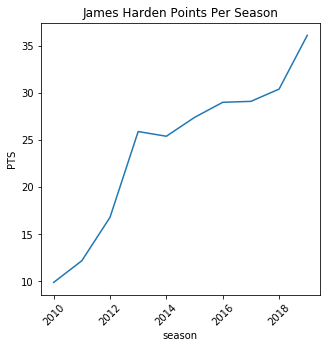

In [100]:
# Check the ppg of James Harden
plt.figure(figsize = (5,5))
plt.title('James Harden Points Per Season')
ppg_chart = sns.lineplot(x = 'season', y = 'PTS', data=nba[nba['player'] == 'James Harden'])
for item in ppg_chart.get_xticklabels():
    item.set_rotation(45)

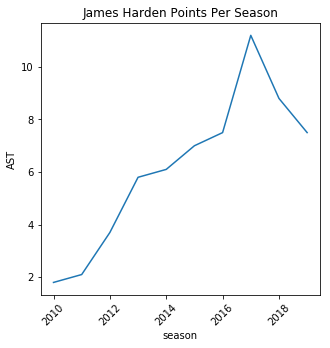

In [101]:
# Check the APG of James Harden
plt.figure(figsize = (5,5))
plt.title('James Harden Points Per Season')
ppg_chart = sns.lineplot(x = 'season', y = 'AST', data=nba[nba['player'] == 'James Harden'])

for item in ppg_chart.get_xticklabels():
    item.set_rotation(45)

In [102]:
harden_stats = nba[nba['player'] == 'James Harden']
harden_stats

,player,season,GP,MIN,PTS,FGM,FGA,TPM,TPA,FTM,FTA,REB,AST,STL,BLK,TOV
0,James Harden,2019.0,78.0,36.8,36.1,10.8,24.5,4.8,13.2,9.7,11.0,6.6,7.5,2.0,0.7,5.0
258,James Harden,2018.0,72.0,35.4,30.4,9.0,20.1,3.7,10.0,8.7,10.1,5.4,8.8,1.8,0.7,4.4
430,James Harden,2017.0,81.0,36.4,29.1,8.3,18.9,3.2,9.3,9.2,10.9,8.1,11.2,1.5,0.5,5.7
584,James Harden,2016.0,82.0,38.1,29.0,8.7,19.7,2.9,8.0,8.8,10.2,6.1,7.5,1.7,0.6,4.6
719,James Harden,2015.0,81.0,36.8,27.4,8.0,18.1,2.6,6.9,8.8,10.2,5.7,7.0,1.9,0.7,4.0
828,James Harden,2014.0,73.0,38.0,25.4,7.5,16.5,2.4,6.6,7.9,9.1,4.7,6.1,1.6,0.4,3.6
920,James Harden,2013.0,78.0,38.3,25.9,7.5,17.1,2.3,6.2,8.6,10.2,4.9,5.8,1.8,0.5,3.8
989,James Harden,2012.0,62.0,31.4,16.8,5.0,10.1,1.8,4.7,5.0,6.0,4.1,3.7,1.0,0.2,2.2
1060,James Harden,2011.0,82.0,26.7,12.2,3.6,8.3,1.4,4.0,3.5,4.2,3.1,2.1,1.1,0.3,1.3
1100,James Harden,2010.0,76.0,22.9,9.9,3.1,7.6,1.2,3.3,2.6,3.2,3.2,1.8,1.1,0.3,1.4


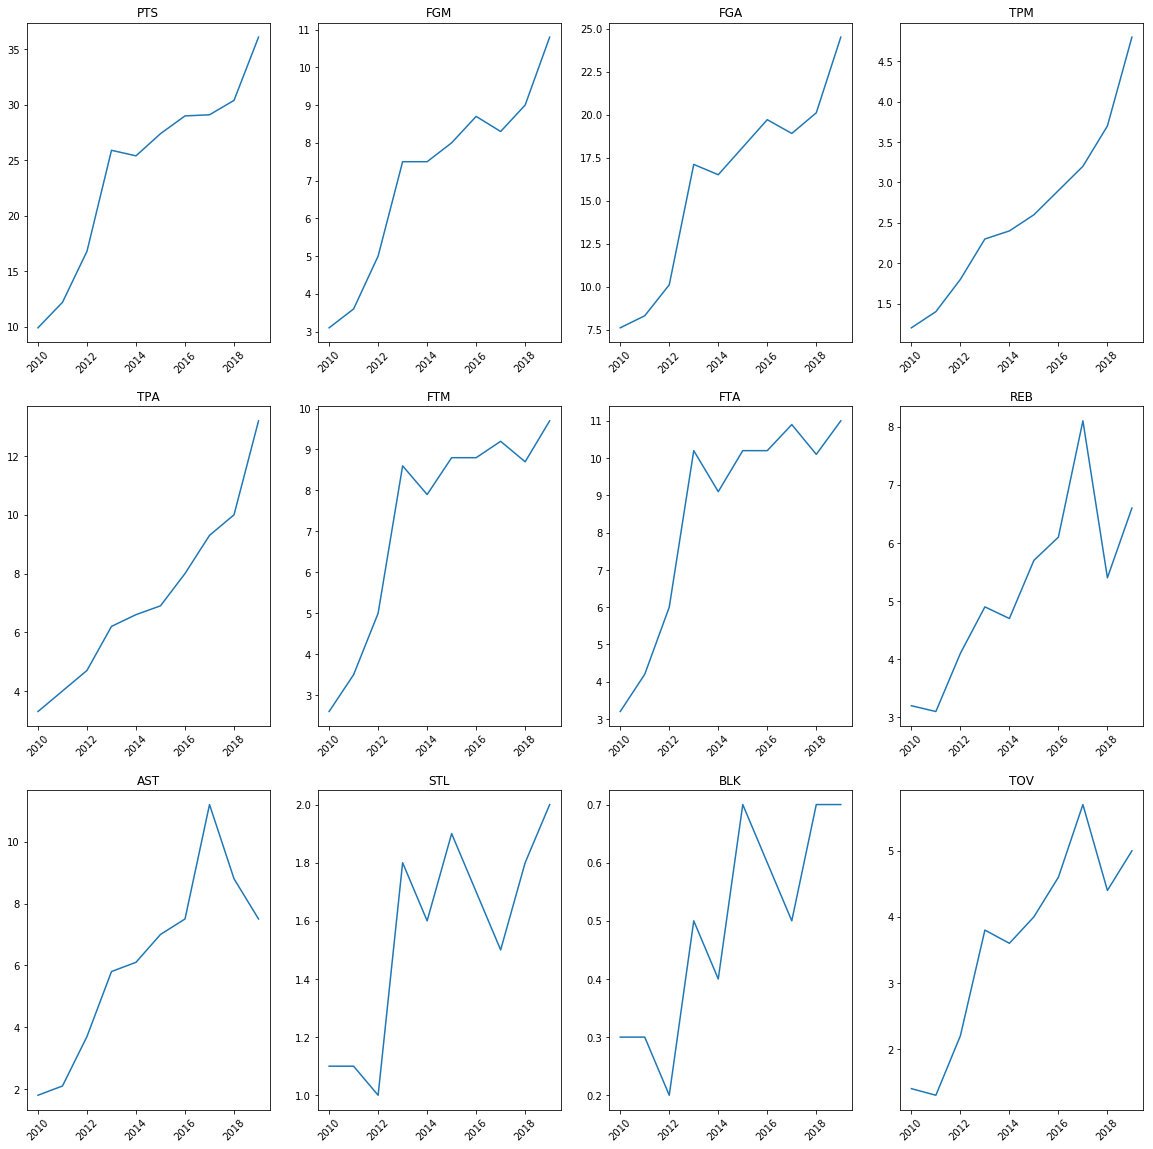

In [103]:
# Check James Harden stats throughout the years
stats_arr = ['PTS','FGM','FGA','TPM','TPA', 'FTM','FTA','REB','AST','STL', 'BLK', 'TOV']
stats_arr[1]

plt.figure(figsize=[20,20])
for stat in range(len(stats_arr)):
    plt.subplot(3,4,stat+1)
    plt.plot(harden_stats.season,harden_stats[stats_arr[stat]])
    plt.title(stats_arr[stat])
    plt.xticks(rotation=45)

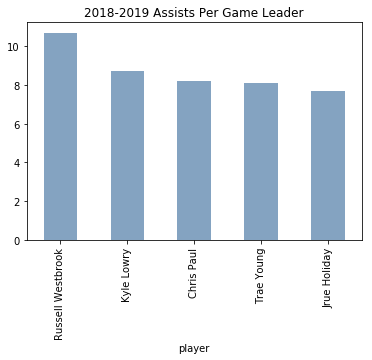

In [104]:
# Stat leaders
# Dataset for 2018-2019 Season
nba_18_19 = nba[nba['season'] == 2019.0]

# Stat Leaders for 2018-2019 Season
# Assists
nba_18_19.groupby('player').AST.mean().sort_values(ascending = False)[:5].plot.bar(
    title = '2018-2019 Assists Per Game Leader', color = (0.2, 0.4,0.6,0.6))

In [105]:
def statLeader(stat, season, count):
    bar_color = (0.2, 0.4, 0.6,0.6)
    if(stat == 'Assists'):
        nba[nba['season'] == season].groupby('player').AST.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('APG Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Points'):
        nba[nba['season'] == season].groupby('player').PTS.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('PPG Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Rebounds'):
        nba[nba['season'] == season].groupby('player').REB.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('RPG Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Steals'):
        nba[nba['season'] == season].groupby('player').STL.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('STL Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Three Pointers Made'):
        nba[nba['season'] == season].groupby('player').TPM.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('3PM Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Blocks'):
        nba[nba['season'] == season].groupby('player').BLK.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('BLK Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')
    elif(stat == 'Field Goals Made'):
        nba[nba['season'] == season].groupby('player').FGM.mean().sort_values(ascending = False)[:count].plot.bar(color = bar_color)
        plt.title('FGM Leaders for the ' + str(int(season) - 1) + '-' + str(int(season)) + ' season')


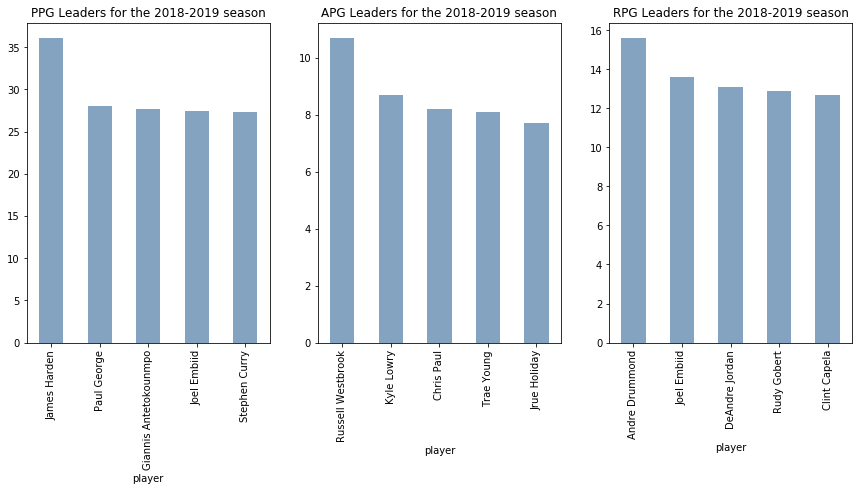

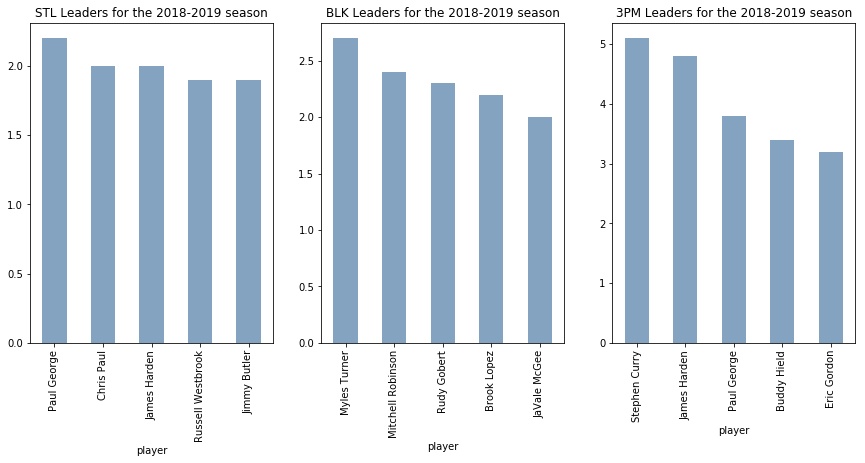

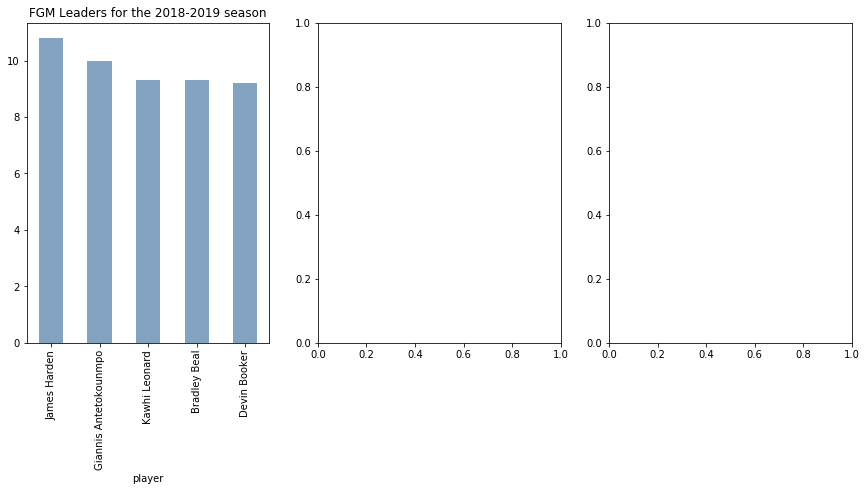

In [106]:
plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statLeader('Points', 2019.0, 5)
plt.subplot(3,4,2)
statLeader('Assists', 2019.0, 5)
plt.subplot(3,4,3)
statLeader('Rebounds', 2019.0, 5)

plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statLeader('Steals', 2019.0, 5)
plt.subplot(3,4,2)
statLeader('Blocks', 2019.0, 5)
plt.subplot(3,4,3)
statLeader('Three Pointers Made', 2019.0, 5)

plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statLeader('Field Goals Made', 2019.0, 5)
plt.subplot(3,4,2)
plt.subplot(3,4,3)

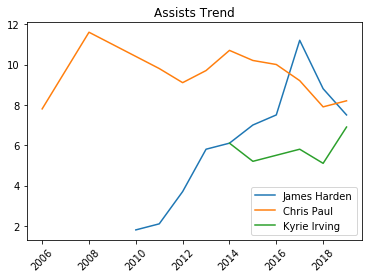

In [107]:
# Compare Assist Trend for Harden, Paul, and Irving
plt.plot( 'season', 'AST', data=nba[nba['player']=='James Harden'])
plt.plot( 'season', 'AST', data=nba[nba['player']=='Chris Paul'])
plt.plot( 'season', 'AST', data=nba[nba['player']=='Kyrie Irving'])
plt.title('Assists Trend')
plt.xticks(rotation=45)
legend = plt.legend()
legend.get_texts()[0].set_text('James Harden')
legend.get_texts()[1].set_text('Chris Paul')
legend.get_texts()[2].set_text('Kyrie Irving')
plt.show()

In [108]:
# Function that compares players trend for whatever statistical category
def statPlayerCompare(stat, player1, player2, player3, player4, player5):
    player_array = [player1, player2, player3, player4, player5]
    
    plt.plot( 'season', stat, data=nba[nba['player']==player_array[0]])
    plt.plot( 'season', stat, data=nba[nba['player']==player_array[1]])
    plt.plot( 'season', stat, data=nba[nba['player']==player_array[2]])
    plt.plot( 'season', stat, data=nba[nba['player']==player_array[3]])
    plt.plot( 'season', stat, data=nba[nba['player']==player_array[4]])
    plt.title(stat + ' per game trends')
    plt.xticks(rotation=45)
    legend = plt.legend(loc= 1, bbox_to_anchor=(1.45, 1.0))
    legend.get_texts()[0].set_text(player_array[0])
    legend.get_texts()[1].set_text(player_array[1])
    legend.get_texts()[2].set_text(player_array[2])
    legend.get_texts()[3].set_text(player_array[3])
    legend.get_texts()[4].set_text(player_array[4])
    plt.show()

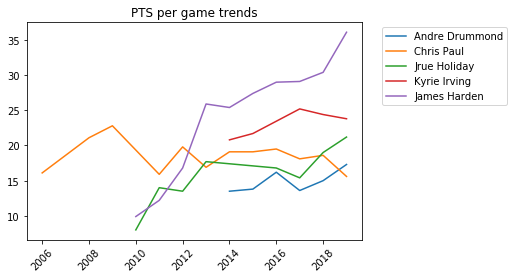

In [109]:
statPlayerCompare('PTS', 'Andre Drummond', 'Chris Paul', 'Jrue Holiday', 'Kyrie Irving', 'James Harden')

In [110]:
# Predict how a player will perform in a statistical category for upcoming season
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = nba[nba['player'] == 'James Harden']
x = data['season']
x = x.values.reshape(-1,1)
y = data['AST']
y = y.values.reshape(-1,1)

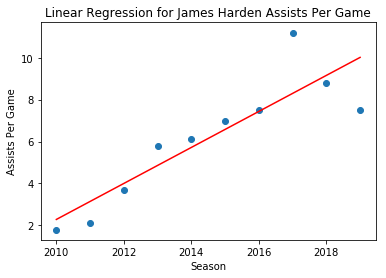

In [111]:
# Linear Regression
model = LinearRegression().fit(x, y)
coef = model.coef_
intercept = model.intercept_


# Plot points along with regression line
plt.scatter(x,y)
plt.plot(x, coef*x + intercept, 'r')
plt.title('Linear Regression for James Harden Assists Per Game')
plt.xlabel('Season')
plt.ylabel('Assists Per Game')
plt.show()

In [112]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression Function
def statRegression(player, stat):
    data = nba[nba['player'] == player]
    x = data['season']
    x = x.values.reshape(-1,1)
    y = data[stat]
    y = y.values.reshape(-1,1)
    
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x)

    poly_model = LinearRegression().fit(x_poly, y)

    poly_coef = poly_model.coef_
    poly_intercept = poly_model.intercept_
    y_poly_pred = poly_model.predict(x_poly)
    
    # Plot points along with regression curve
    plt.scatter(x,y)
    plt.plot(x, y_poly_pred, 'r')
    plt.title('Regression for ' + player + ' '+ stat +' Per Game')
    plt.xlabel('Season')
    plt.ylabel(stat+ ' Per Game')

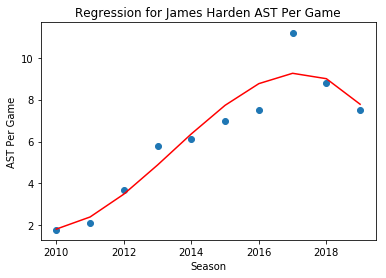

In [115]:
statRegression('James Harden', 'AST')

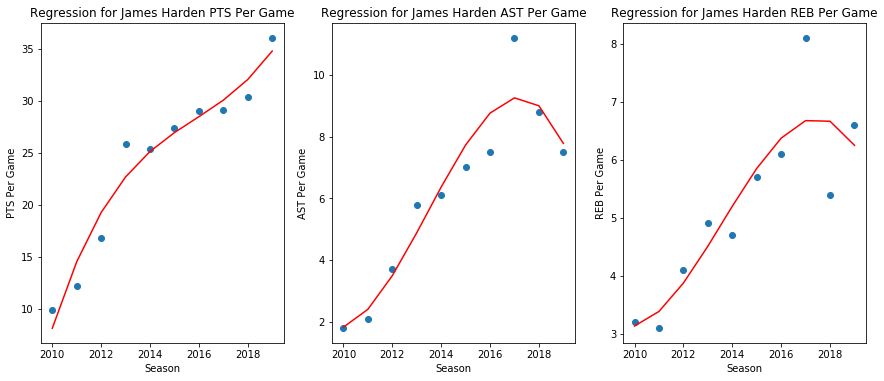

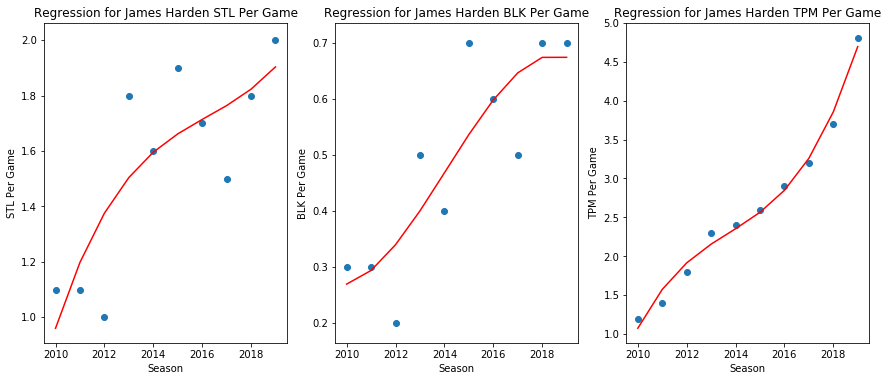

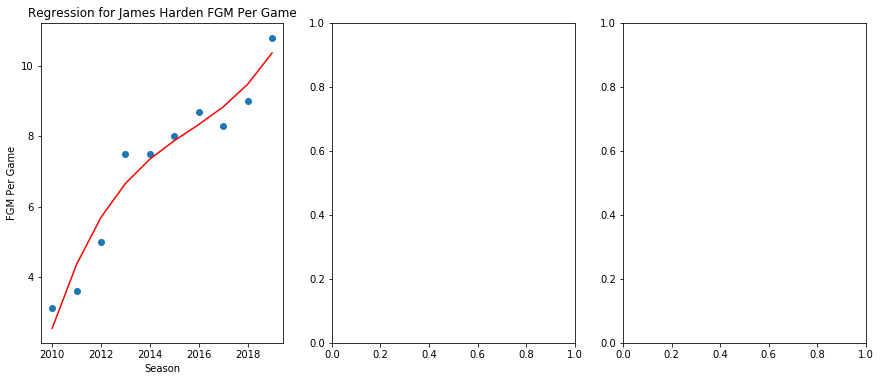

In [119]:
plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statRegression('James Harden', 'PTS')
plt.subplot(3,4,2)
statRegression('James Harden', 'AST')
plt.subplot(3,4,3)
statRegression('James Harden', 'REB')

plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statRegression('James Harden', 'STL')
plt.subplot(3,4,2)
statRegression('James Harden', 'BLK')
plt.subplot(3,4,3)
statRegression('James Harden', 'TPM')

plt.figure(figsize=[20,20])
plt.subplot(3,4,1)
statRegression('James Harden', 'FGM')
plt.subplot(3,4,2)
plt.subplot(3,4,3)

plt.show()